# Importing libraries

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Loading dataset

In [ ]:
crop = pd.read_csv('https://raw.githubusercontent.com/sandyram19/Crop-Recommendation-System/main/Crop_recommendation.csv')
# crop=pd.read_csv('Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Analysing Data

In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['label'].nunique()

22

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

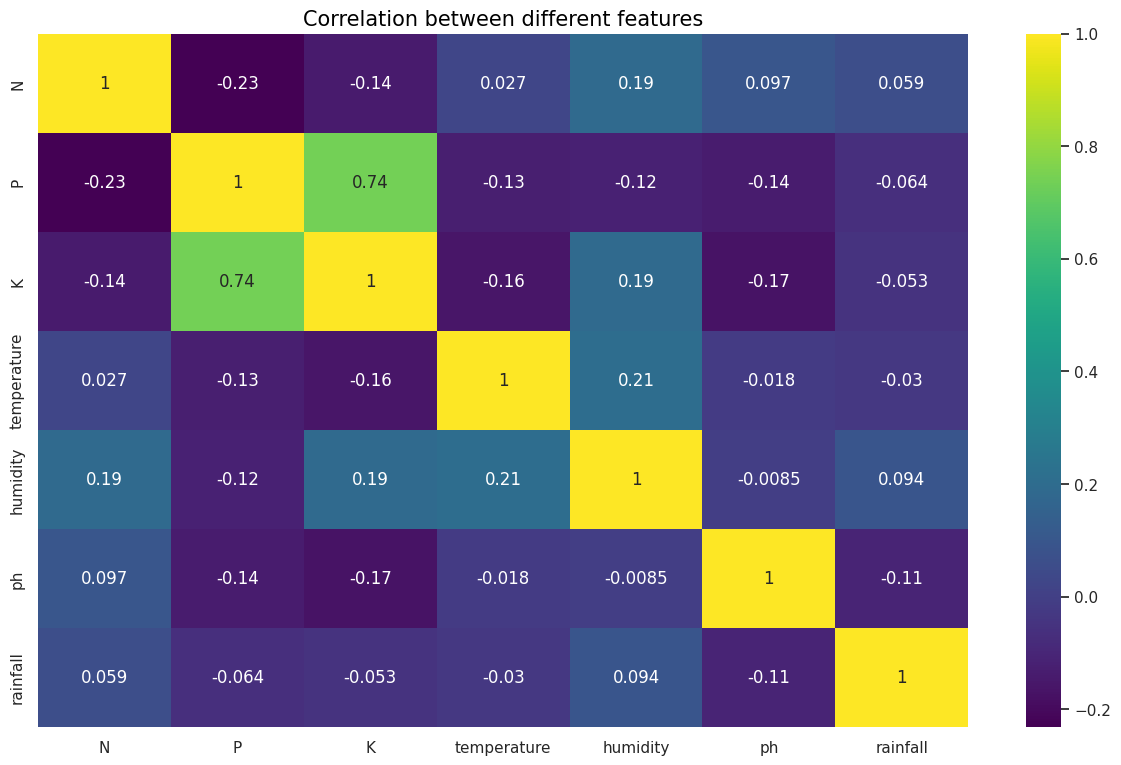

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()


In [ ]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


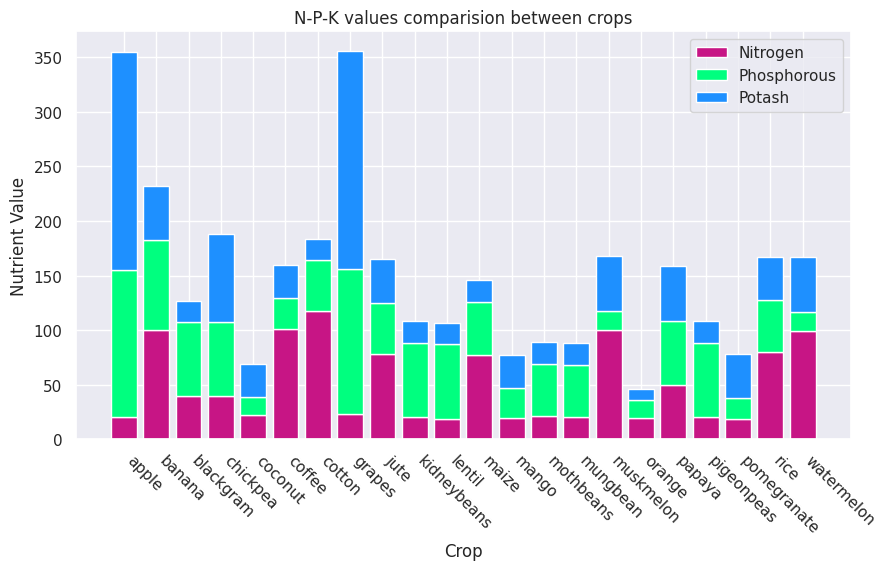

In [ ]:
x = crop_summary.index
y1 = crop_summary['N']
y2 = crop_summary['P']
y3 = crop_summary['K']

color1 = 'mediumvioletred'
color2 = 'springgreen'
color3 = 'dodgerblue'


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=color1, label='Nitrogen')
ax.bar(x, y2, color=color2, bottom=y1, label='Phosphorous')
ax.bar(x, y3, color=color3, bottom=y1+y2, label='Potash')

ax.set_title("N-P-K values comparision between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Nutrient Value")
plt.xticks(rotation=-45, ha='left', va='top') 


ax.legend()
plt.subplots_adjust(bottom=0.2) 
plt.show()



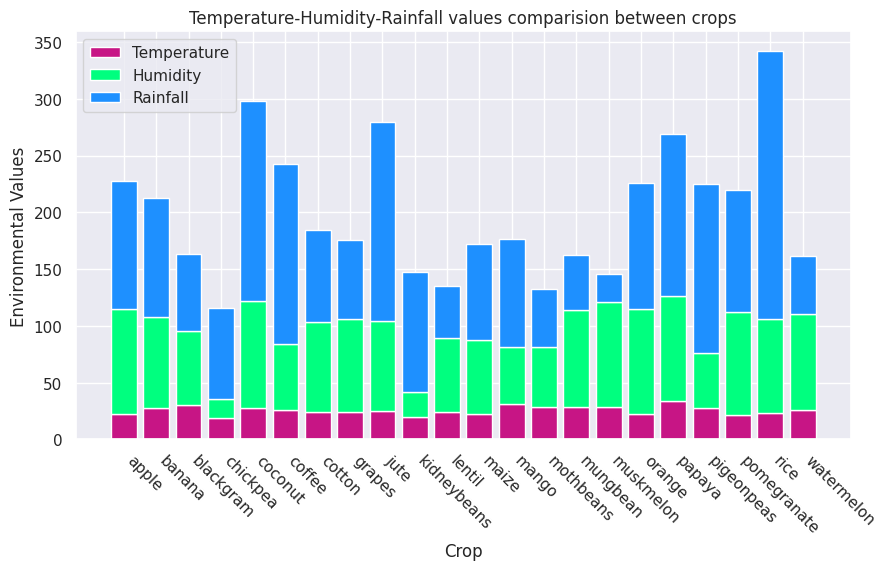

In [ ]:
x = crop_summary.index
y1 = crop_summary['temperature']
y2 = crop_summary['humidity']
y3 = crop_summary['rainfall']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=color1, label='Temperature')
ax.bar(x, y2, color=color2, bottom=y1, label='Humidity')
ax.bar(x, y3, color=color3, bottom=y1+y2, label='Rainfall')

ax.set_title("Temperature-Humidity-Rainfall values comparision between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Environmental Values")
plt.xticks(rotation=-45, ha='left', va='top') 


ax.legend()
plt.subplots_adjust(bottom=0.2) 
plt.show()



# Clustering

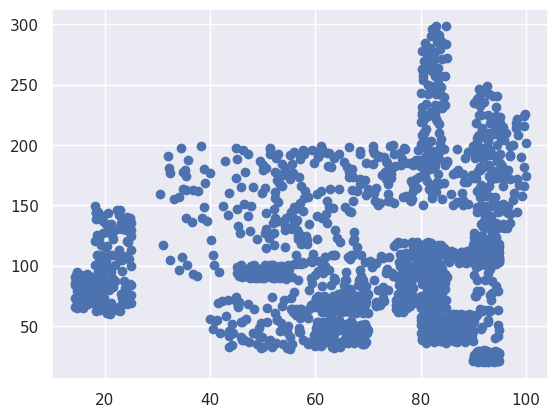

In [ ]:
plt.scatter(crop['humidity'],crop['rainfall'])

In [ ]:
clst = crop.loc[:, ['humidity','rainfall']].values
print(clst.shape)

clst_data  = pd.DataFrame(clst)
clst_data.head()

(2200, 2)


,0,1
0,82.002744,202.935536
1,80.319644,226.655537
2,82.320763,263.964248
3,80.158363,242.864034
4,81.604873,262.717340


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clst_scaled=scaler.fit_transform(clst_data)
clst_scaled = pd.DataFrame(clst_scaled, columns=['humidity','rainfall'])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(clst_data)
    wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

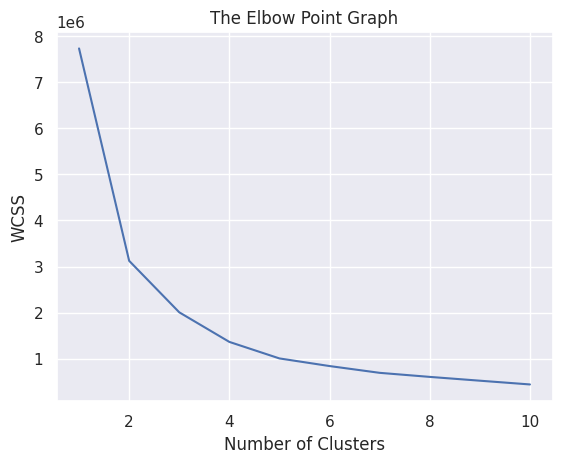

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(clst_scaled)

a = crop['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([clst_scaled['humidity'],clst_scaled['rainfall'],y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())




Crops in First Cluster: ['rice' 'maize' 'pigeonpeas' 'mungbean' 'blackgram' 'lentil' 'pomegranate'
 'banana' 'grapes' 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya'
 'coconut' 'cotton' 'jute' 'coffee']
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'blackgram'
 'lentil' 'mango' 'coffee']


[[0.82666808 0.32028809]
 [0.36903309 0.25933691]]


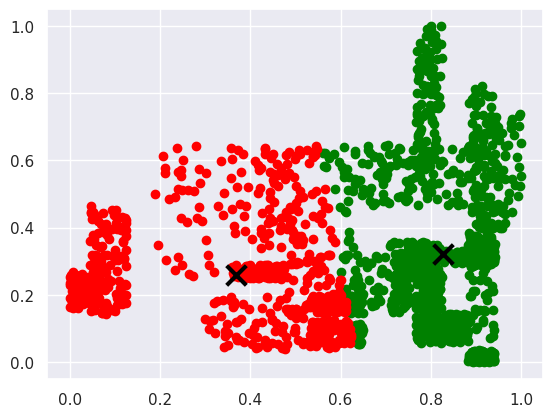

In [ ]:
centers=km.cluster_centers_
print(centers)
c1=z[z['cluster'] == 0]
c2=z[z['cluster'] == 1]
plt.scatter(c1['humidity'],c1['rainfall'],color='green')
plt.scatter(c2['humidity'],c2['rainfall'],color='red')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='black')



Independent and Target variables

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
acc = []
model = []
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

#  KNN

In [ ]:
"""class SimpleKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
      y_pred = []
      for x in X_test.itertuples(index=False):

        # Compute the Euclidean distance between x and each point in the training set
        distances = [sum([abs(getattr(x, col) - getattr(self.X.iloc[j], col)) for col in X_test.columns]) for j in range(len(self.X))]
        # distances = [sum([abs(getattr(x, f'_{i+1}') - getattr(self.X.iloc[j], f'_{i+1}')) for i in range(len(x))]) for j in range(len(self.X))]
        # Sort the distances in ascending order and get the indices of the k closest points
        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]

        # Get the labels of the k closest points and find the most common label
        k_labels = [self.y.iloc[i] for i in k_indices]
        most_common = max(set(k_labels), key=k_labels.count)

        y_pred.append(most_common)

      return y_pred"""



"class SimpleKNN:\n    def __init__(self, k=5):\n        self.k = k\n\n    def fit(self, X, y):\n        self.X = X\n        self.y = y\n\n    def predict(self, X_test):\n      y_pred = []\n      for x in X_test.itertuples(index=False):\n\n        # Compute the Euclidean distance between x and each point in the training set\n        distances = [sum([abs(getattr(x, col) - getattr(self.X.iloc[j], col)) for col in X_test.columns]) for j in range(len(self.X))]\n        # distances = [sum([abs(getattr(x, f'_{i+1}') - getattr(self.X.iloc[j], f'_{i+1}')) for i in range(len(x))]) for j in range(len(self.X))]\n        # Sort the distances in ascending order and get the indices of the k closest points\n        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]\n\n        # Get the labels of the k closest points and find the most common label\n        k_labels = [self.y.iloc[i] for i in k_indices]\n        most_common = max(set(k_labels), key=k_labels.count)\n\n      

In [ ]:
"""sKNN=SimpleKNN(3)
sKNN.fit(x_train,y_train)

predicted_values = sKNN.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))"""

'sKNN=SimpleKNN(3)\nsKNN.fit(x_train,y_train)\n\npredicted_values = sKNN.predict(x_test)\n\nx = metrics.accuracy_score(y_test, predicted_values)\nacc.append(x)\nmodel.append(\'K Nearest Neighbours\')\nprint("KNN Accuracy is: ", x)\n\nprint(classification_report(y_test,predicted_values))'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("KNN Accuracy is: ", x)


KNN Accuracy is:  0.975


In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [ ]:
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))

knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


# Hyperparameter Tuning 



In [ ]:
a=[]
for i in range(1,47,2):
    a.append(i)
len(a)

23

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : a,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=7, n_jobs = -1)

In [ ]:
g_res = gs.fit(x_train, y_train)
gsresult=pd.DataFrame(g_res.cv_results_)
gsresult.head()

Fitting 7 folds for each of 138 candidates, totalling 966 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008632,0.002535,0.022316,0.004788,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
1,0.008029,0.000892,0.009845,0.003427,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
2,0.007533,0.000922,0.016199,0.001069,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.984064,0.980080,0.964143,0.980080,0.978406,0.007018,29
3,0.006846,0.000409,0.007103,0.000667,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.980080,0.980080,0.964143,0.984064,0.978406,0.007018,31
4,0.007445,0.000710,0.019064,0.000821,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.992063,0.980159,0.988095,0.984064,0.980080,0.968127,0.984064,0.982379,0.007025,5


In [ ]:
gsresult=pd.DataFrame(g_res.cv_results_)
gsresult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008632,0.002535,0.022316,0.004788,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
1,0.008029,0.000892,0.009845,0.003427,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
2,0.007533,0.000922,0.016199,0.001069,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.984064,0.980080,0.964143,0.980080,0.978406,0.007018,29
3,0.006846,0.000409,0.007103,0.000667,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.980080,0.980080,0.964143,0.984064,0.978406,0.007018,31
4,0.007445,0.000710,0.019064,0.000821,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.992063,0.980159,0.988095,0.984064,0.980080,0.968127,0.984064,0.982379,0.007025,5


In [ ]:
gsresult[['param_metric','param_weights','param_n_neighbors','mean_test_score']].head()

,param_metric,param_weights,param_n_neighbors,mean_test_score
0,minkowski,uniform,1,0.980676
1,minkowski,distance,1,0.980676
2,minkowski,uniform,3,0.978406
3,minkowski,distance,3,0.978406
4,minkowski,uniform,5,0.982379


In [ ]:
g_res.best_score_

0.9846554823788746

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

knn_train_accuracy =  1.0
knn_test_accuracy =  0.975
Cross validation score:  [0.97954545 0.98636364 0.98636364 0.98636364 0.97727273]
0.9831818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00  

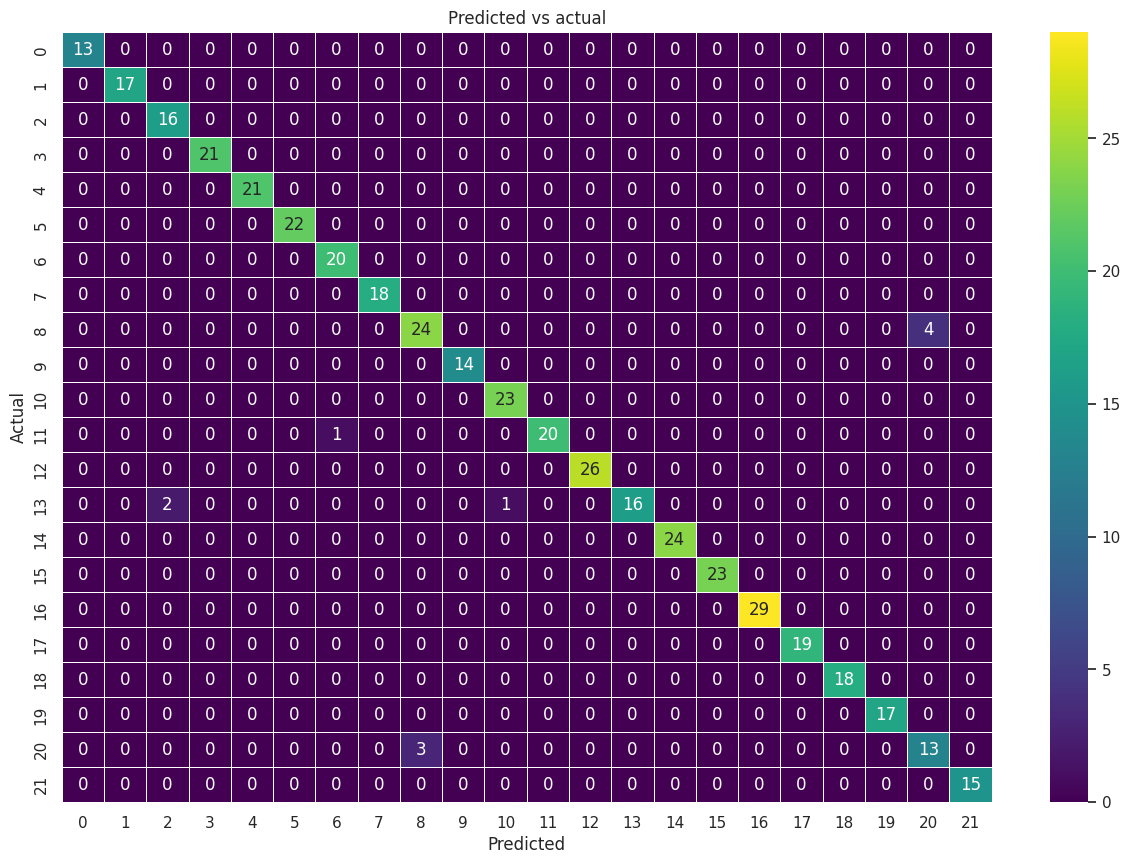

In [ ]:
best_knn=KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'manhattan')
best_knn.fit(x_train, y_train)
predicted_values = best_knn.predict(x_test)

knn_train_accuracy = best_knn.score(x_train,y_train)
print("knn_train_accuracy = ",best_knn.score(x_train,y_train))

knn_test_accuracy = best_knn.score(x_test,y_test)
print("knn_test_accuracy = ",best_knn.score(x_test,y_test))

score = cross_val_score(best_knn,features,target,cv=5)
print('Cross validation score: ',score)

print(score.mean())

acc.append(score.mean())
model.append('K Nearest Neighbours')

print(classification_report(y_test,predicted_values))

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs = GridSearchCV(GaussianNB(), params_NB, verbose = 1, cv=7, n_jobs = -1)

In [ ]:
g_res = gs.fit(x_train, y_train)
gsresult=pd.DataFrame(g_res.cv_results_)
gsresult.head()

Fitting 7 folds for each of 100 candidates, totalling 700 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012920,0.002869,0.004897,0.000565,1.0,{'var_smoothing': 1.0},0.869048,0.853175,0.853175,0.840637,0.860558,0.864542,0.852590,0.856246,0.008678,100
1,0.013691,0.006134,0.005719,0.002138,0.811131,{'var_smoothing': 0.8111308307896871},0.880952,0.873016,0.876984,0.884462,0.888446,0.884462,0.872510,0.880119,0.005681,99
2,0.010967,0.002641,0.004128,0.000303,0.657933,{'var_smoothing': 0.657933224657568},0.896825,0.880952,0.880952,0.912351,0.912351,0.888446,0.888446,0.894332,0.012438,98
3,0.009761,0.000242,0.004556,0.001143,0.53367,{'var_smoothing': 0.533669923120631},0.916667,0.880952,0.896825,0.912351,0.920319,0.900398,0.912351,0.905695,0.012771,97
4,0.009556,0.000082,0.004078,0.000113,0.432876,{'var_smoothing': 0.43287612810830584},0.924603,0.888889,0.900794,0.912351,0.920319,0.904382,0.916335,0.909667,0.011505,96


In [ ]:
g_res.best_score_

0.9960204533340561

In [ ]:
g_res.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [ ]:
NaiveBayes=GaussianNB(var_smoothing= 1.873817422860383e-05)

In [ ]:
score = cross_val_score(GaussianNB(var_smoothing= 1.873817422860383e-05),features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [ ]:
NaiveBayes.fit(x_train,y_train)
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))

nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.9886363636363636


In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

print(score.mean())

acc.append(score.mean())
model.append('Naive Bayes')

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
0.9950000000000001


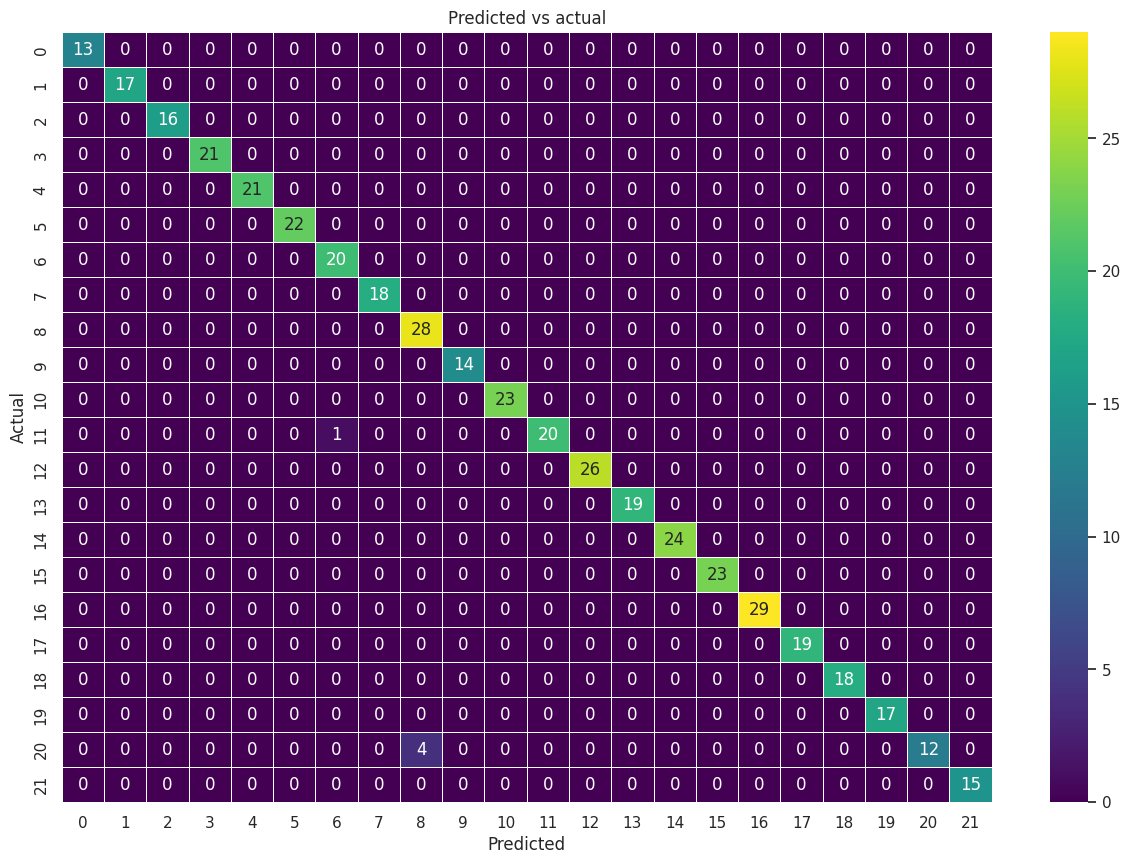

In [ ]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("Decision Tree's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  0.9
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001], 'max_depth' : [5, 6, 7, 8, 9], 'criterion' :['gini', 'entropy']}
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True)
gs.fit(x_train, y_train)
g_res = gs.fit(x_train, y_train)
gsresult=pd.DataFrame(g_res.cv_results_)


In [ ]:
gsresult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006566,0.002280,0.002362,0.000676,0.1,gini,5,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
1,0.004926,0.000563,0.001944,0.000317,0.1,gini,5,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
2,0.004756,0.000084,0.001868,0.000178,0.1,gini,5,log2,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
3,0.005270,0.000201,0.002040,0.000420,0.1,gini,6,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
4,0.005675,0.001435,0.001830,0.000074,0.1,gini,6,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76


In [ ]:
g_res.best_score_

0.9653409090909092

In [ ]:
g_res.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto'}

In [ ]:
DT=DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy',max_depth=9,max_features='log2')

In [ ]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)
print(score.mean())

acc.append(score.mean())
model.append('Decision Tree')

Cross validation score:  [0.97954545 0.975      0.96136364 0.95681818 0.96136364]
0.9668181818181818


In [ ]:
DT.fit(x_train,y_train)
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))

dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.96875
Testing accuracy =  0.9454545454545454


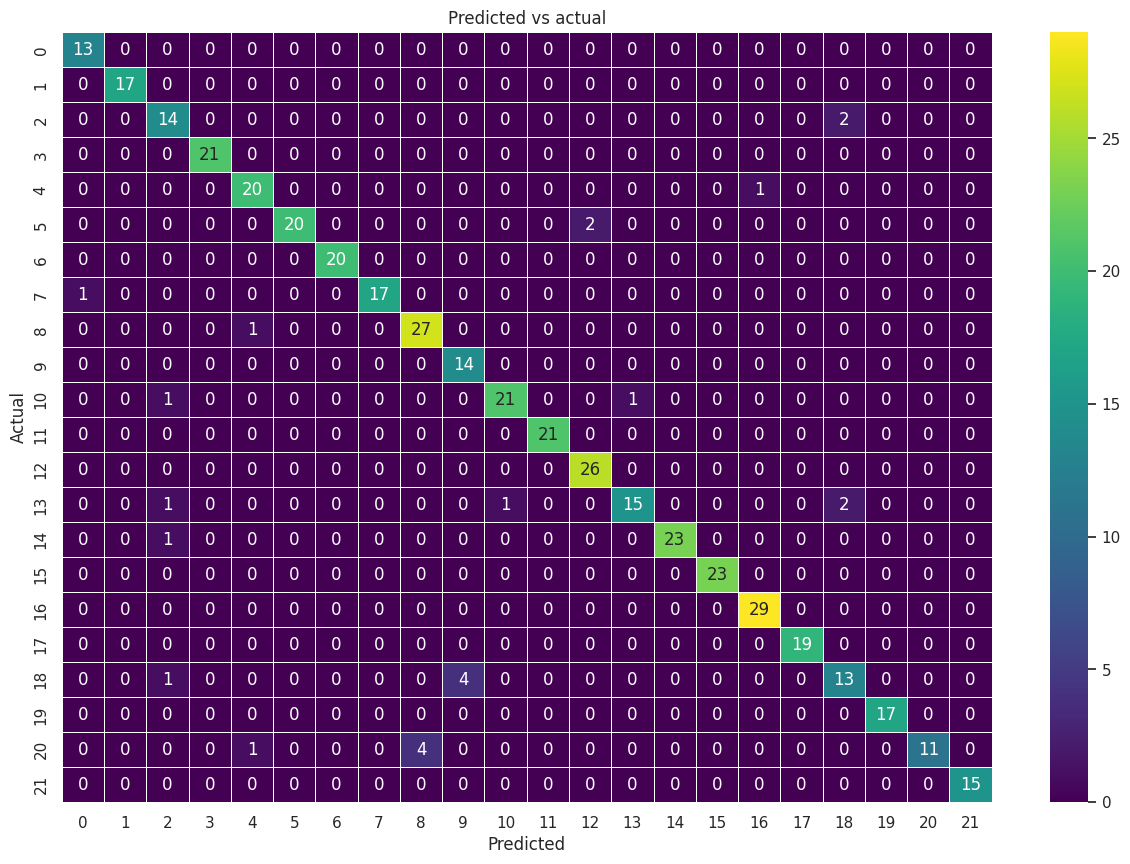

In [ ]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)
print(score.mean())
acc.append(score.mean())
model.append('Random Forest')

Cross validation score:  [0.99545455 0.99318182 0.99772727 0.99545455 0.98863636]
0.9940909090909091


In [ ]:
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))

rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


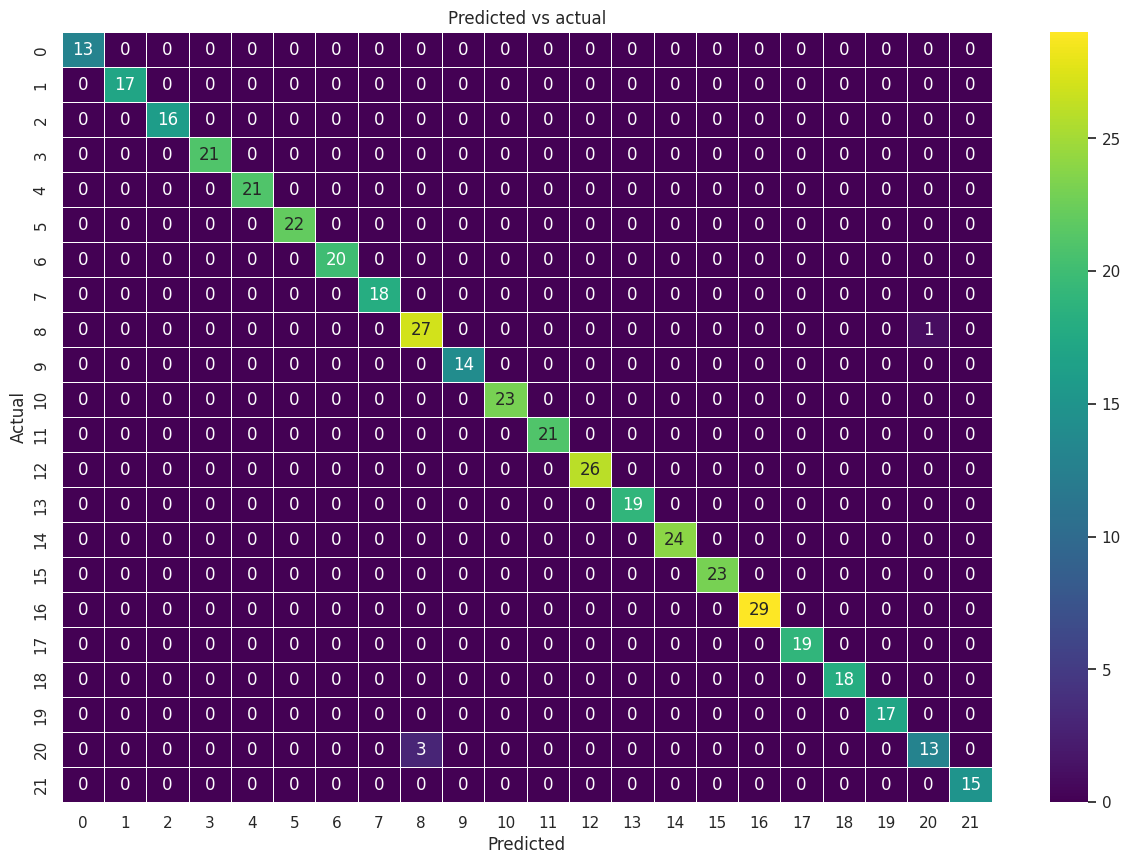

In [ ]:
y_pred = RF.predict(x_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC()

SVM.fit(x_train,y_train)

predicted_values = SVM.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01,'auto','scale'],
              'kernel': ['linear', 'poly','rbf']} 
gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.986 total time=   2.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.991 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.989 total time=  40.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.983 total time=   7.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.991 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.048 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 'auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [ ]:
gs.best_score_

0.9897727272727274

In [ ]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
SVM = SVC(C=10,gamma=1,kernel='linear')

In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
print("CV score",score)
print(score.mean())

acc.append(score.mean())
model.append('SVC')

CV score [0.98181818 0.98863636 0.98636364 0.97954545 0.98409091]
0.9840909090909091


In [ ]:
SVM.fit(x_train,y_train)
svc_train_accuracy = SVM.score(x_train,y_train)
print("Training accuracy = ",SVM.score(x_train,y_train))

rf_test_accuracy = SVM.score(x_test,y_test)
print("Testing accuracy = ",SVM.score(x_test,y_test))

Training accuracy =  0.99375
Testing accuracy =  0.9772727272727273


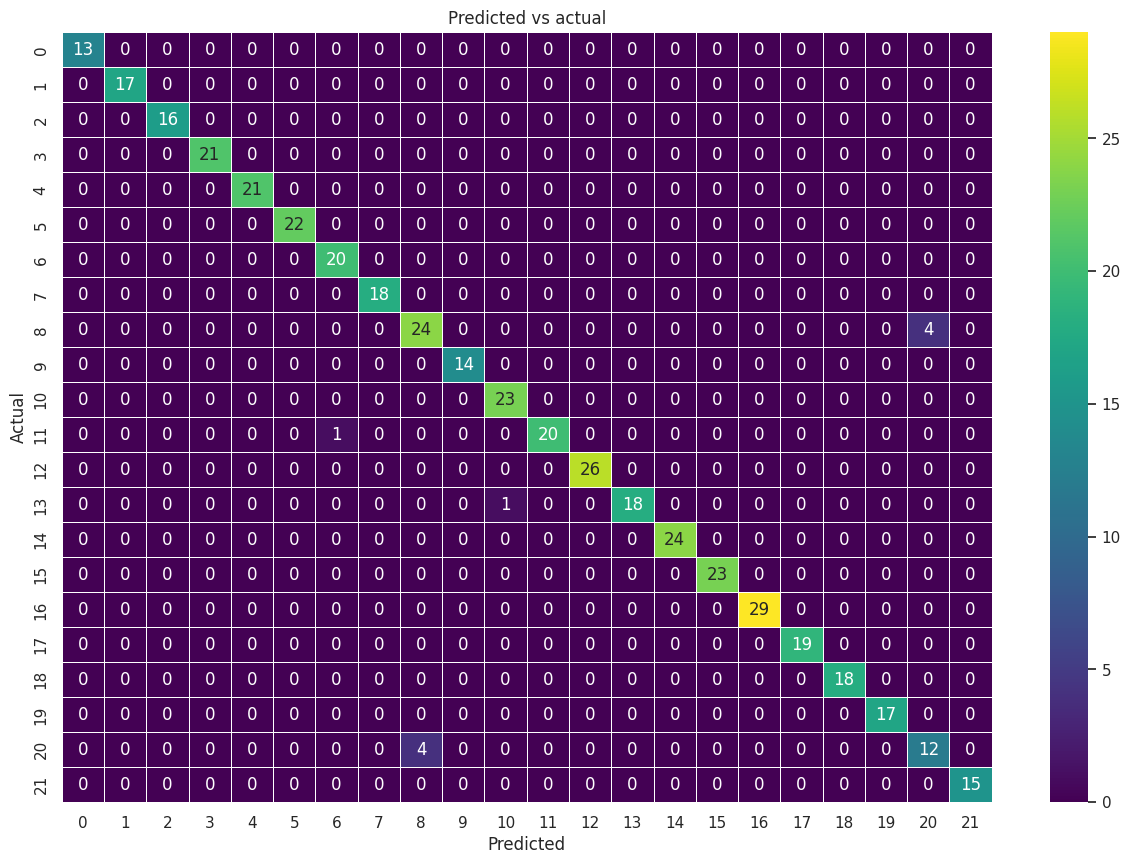

In [ ]:
y_pred = SVM.predict(x_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Results

In [ ]:
modeldict = {'Model Name': model, 'Accuracy': acc}
modelDF=pd.DataFrame(modeldict)
modelDF

,Model Name,Accuracy
0,K Nearest Neighbours,0.983182
1,Naive Bayes,0.995000
2,Decision Tree,0.966818
3,Random Forest,0.994091
4,SVC,0.984091


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print("Transformed Data:")
print(X_pca)
X_pca.shape


Explained Variance Ratio: [0.27588831 0.18484431 0.15378704]
Transformed Data:
[[-0.58286944 -0.84458562  1.37334307]
 [-0.47463491 -0.78489453  1.2521779 ]
 [-0.63406838 -0.69452246  1.17933163]
 ...
 [-1.15838352 -0.64047494  1.0458397 ]
 [-1.21918792  0.05238989  0.18085534]
 [-1.3730036   0.05581764  0.50065432]]


(2200, 3)

In [ ]:
x_trainPca, x_testPca, y_train, y_test = train_test_split(X_pca,target,test_size = 0.2,random_state =2)

NaiveBayes.fit(x_trainPca,y_train)
y_pred = NaiveBayes.predict(x_testPca)
y_true = y_test
NaiveBayes.score(x_testPca,y_test)

0.7022727272727273

In [ ]:
nit=float(input("Enter Nitrogen value "))
p=float(input("Enter Phosphorous value "))
k=float(input("Enter Potasium value "))
temp=float(input("Enter Temperature value "))
hum=float(input("Enter Humidity value "))
ph=float(input("Enter ph value "))
rain=float(input("Enter rainfall value "))
fl=[nit,p,k,temp,hum,ph,rain]

Enter Nitrogen value 20.8
Enter Phosphorous value 134.22
Enter Potasium value 199.89
Enter Temperature value 25.68
Enter Humidity value 80.35
Enter ph value 7.13
Enter rainfall value 104.62


In [ ]:
"""20.8
134.22
199.89
25.68
80.35
7.13
104.62"""
x = np.array(fl).reshape(1,7) 
y_pred =NaiveBayes.predict(x)[0]

print("The recommended crop is ", y_pred)


The recommended crop is  apple


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
